In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('energy/KwhConsumptionBlower78_1.csv')

In [3]:
df.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [4]:
d2 = pd.read_csv('energy/KwhConsumptionBlower78_2.csv')
d3 = pd.read_csv('energy/KwhConsumptionBlower78_3.csv')

In [5]:
d2.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,0,21 Jan 2022,01:57:23,4.632
1,1,21 Jan 2022,06:15:59,6.080
2,2,21 Jan 2022,13:11:00,3.194
3,3,21 Jan 2022,15:22:43,2.038
4,4,21 Jan 2022,22:01:21,7.428


In [6]:
d3.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,0,01 Feb 2022,14:41:48,1.016
1,1,01 Feb 2022,17:28:44,0.928
2,2,01 Feb 2022,19:51:07,0.988
3,3,01 Feb 2022,07:26:39,1.126
4,4,01 Feb 2022,05:20:47,0.886


In [7]:
df_n = pd.concat([df,d2,d3])

In [8]:
df_n.describe

<bound method NDFrame.describe of       Unnamed: 0      TxnDate   TxnTime  Consumption
0          76229  01 Jan 2022  16:55:52        1.010
1          76258  01 Jan 2022  21:45:29        0.908
2          76287  01 Jan 2022  12:24:52        0.926
3          76316  01 Jan 2022  04:07:36        0.928
4          76345  01 Jan 2022  06:52:25        0.916
...          ...          ...       ...          ...
1743        1743  28 Feb 2022  22:01:52        1.020
1744        1744  28 Feb 2022  08:54:15        0.948
1745        1745  28 Feb 2022  06:26:48        0.912
1746        1746  28 Feb 2022  03:21:12        1.064
1747        1747  28 Feb 2022  18:38:23        0.976

[3606 rows x 4 columns]>

In [9]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3606 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3606 non-null   int64  
 1   TxnDate      3606 non-null   object 
 2   TxnTime      3606 non-null   object 
 3   Consumption  3606 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 140.9+ KB


In [10]:
import matplotlib.pyplot as plt

In [11]:
df_n.columns

Index(['Unnamed: 0', 'TxnDate', 'TxnTime', 'Consumption'], dtype='object')

In [12]:
df_n.columns = ["id","date","time","consumption"]

In [13]:
def date_parser(x, y):
    return pd.to_datetime(x + ' ' + y, format='%d %b %Y %H:%M:%S')

df_n['datetime'] = df_n.apply(lambda row: date_parser(row['date'], row['time']), axis=1)

In [14]:
df_n.head()

,id,date,time,consumption,datetime
0,76229,01 Jan 2022,16:55:52,1.010,2022-01-01 16:55:52
1,76258,01 Jan 2022,21:45:29,0.908,2022-01-01 21:45:29
2,76287,01 Jan 2022,12:24:52,0.926,2022-01-01 12:24:52
3,76316,01 Jan 2022,04:07:36,0.928,2022-01-01 04:07:36
4,76345,01 Jan 2022,06:52:25,0.916,2022-01-01 06:52:25


In [15]:
df_n = df_n.drop({'date','time'}, axis=1)

In [16]:
df_n.sort_values('datetime').rolling('1D',on='datetime').sum()

,consumption,id,datetime
43,1.030,77476.0,2022-01-01 00:22:28
19,1.934,154256.0,2022-01-01 00:42:33
25,2.838,231210.0,2022-01-01 01:01:51
11,4.688,307758.0,2022-01-01 01:41:48
29,6.566,384828.0,2022-01-01 02:22:52
...,...,...,...
1695,67.912,109548.0,2022-02-28 22:25:43
1710,67.764,109596.0,2022-02-28 22:44:37
1684,67.880,109641.0,2022-02-28 23:07:15
1725,68.012,109719.0,2022-02-28 23:29:13


In [17]:
df = df_n.sort_values(by='datetime', ascending=True)

In [18]:
df.to_csv('Biodata.csv', index=False)

# HOURLY CONSUMPTION

<AxesSubplot:title={'center':'Hourly energy consumption'}, xlabel='datetime'>

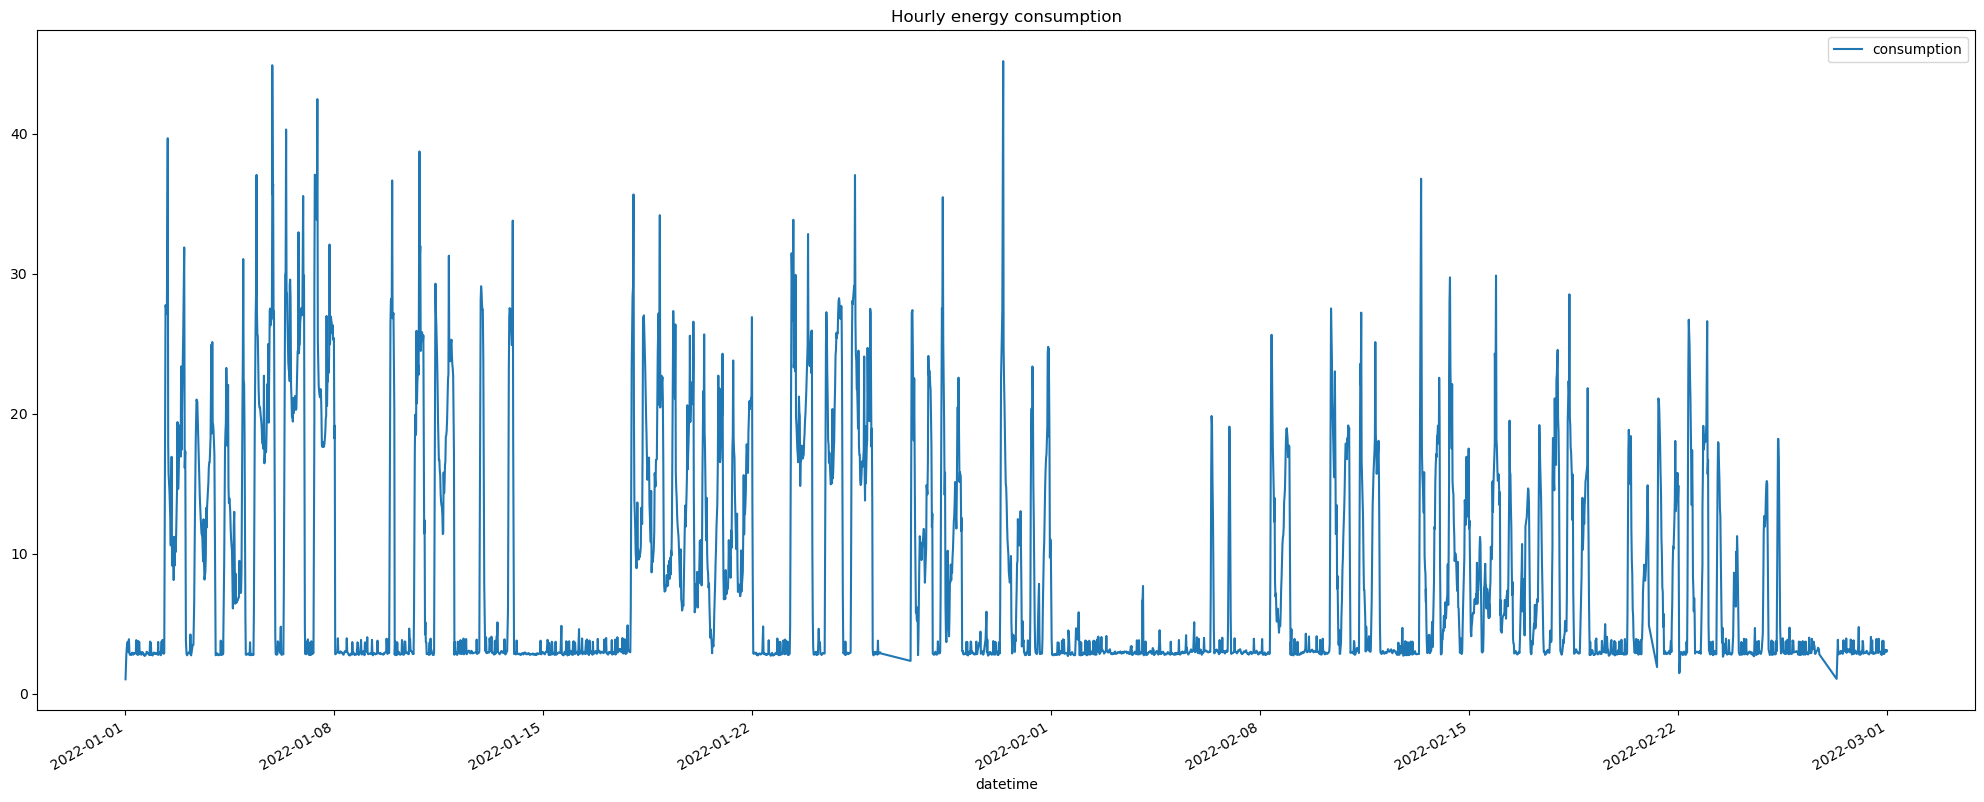

In [18]:
df.rolling('1H',on='datetime').sum().loc[df['consumption']>0.5].plot(x='datetime',y='consumption',title="Hourly energy consumption",figsize=(25,10))

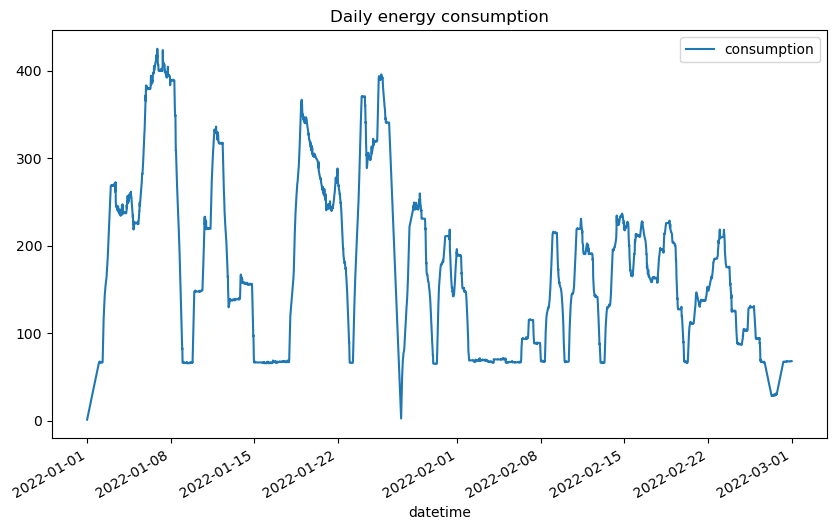

In [19]:
daily_cons = df.rolling('1d',on='datetime').sum()
daily_cons.plot(x='datetime',y='consumption',title="Daily energy consumption",figsize=(10,6))
plt.show()

In [20]:
day_condition = (df['datetime'].dt.time >= pd.Timestamp('06:00').time()) & (df['datetime'].dt.time < pd.Timestamp('18:00').time())
night_condition = (df['datetime'].dt.time < pd.Timestamp('06:00').time()) | (df['datetime'].dt.time >= pd.Timestamp('18:00').time())


day_consumption = df[(day_condition) & (df['consumption'] > 0.5)]


night_consumption = df[night_condition].sort_values('datetime')
night_consumption = night_consumption[night_consumption['consumption'] > 0.5]

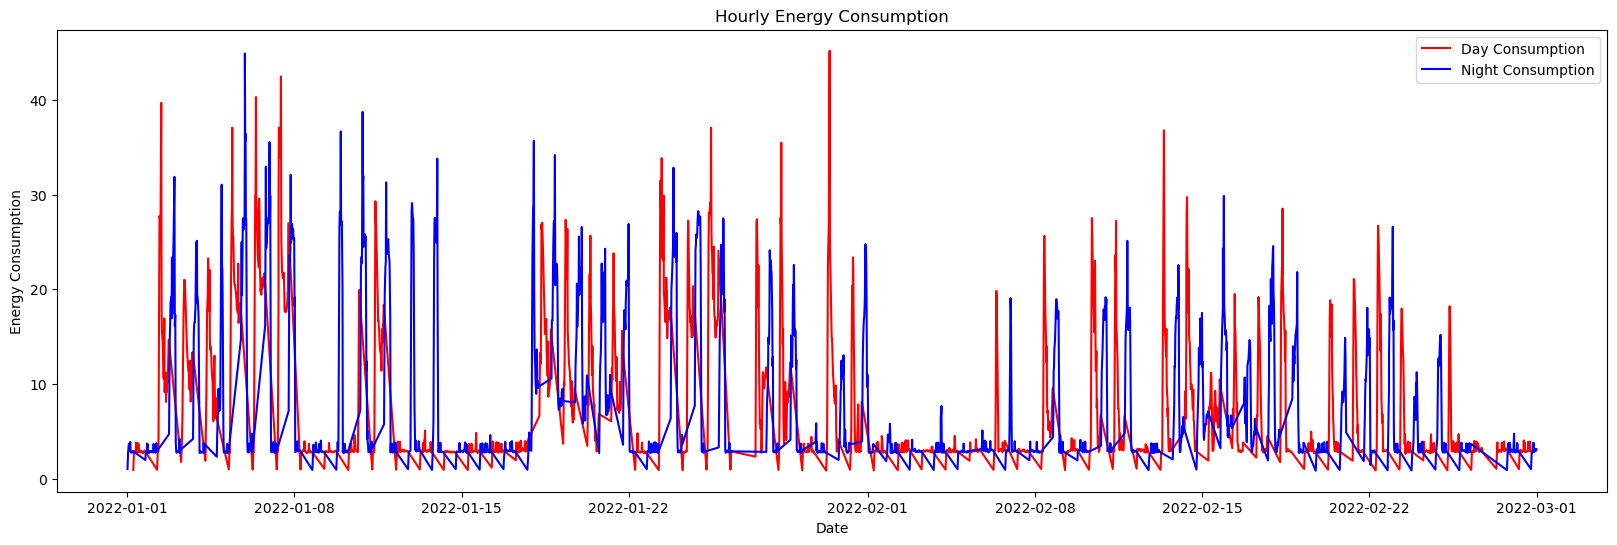

In [21]:
fig,ax= plt.subplots(1,1,figsize=(20,6))
day_hourly_cons = day_consumption.rolling('1H',on='datetime').sum()
night_hourly_cons = night_consumption.rolling('1H',on='datetime').sum()
ax.plot(day_hourly_cons['datetime'],day_hourly_cons['consumption'],'r-',label='Day Consumption')
ax.plot(night_hourly_cons['datetime'],night_hourly_cons['consumption'],'b-',label='Night Consumption')
ax.legend()
ax.set_title("Hourly Energy Consumption")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()


In [22]:
daily_day_cons= day_consumption.rolling('1d',on='datetime').sum()
daily_night_cons= night_consumption.rolling('1d',on='datetime').sum()

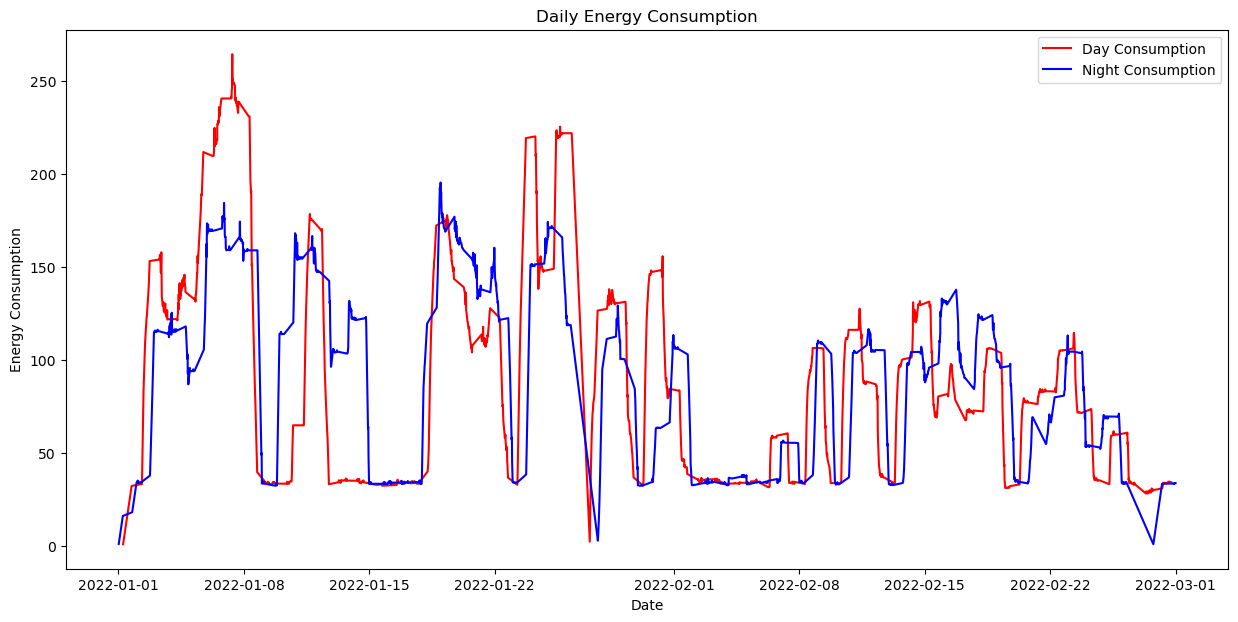

In [23]:
fig,ax= plt.subplots(1,1,figsize=(15,7))

ax.plot(daily_day_cons['datetime'],daily_day_cons['consumption'],'r-',label='Day Consumption')
ax.plot(daily_night_cons['datetime'],daily_night_cons['consumption'],'b-',label='Night Consumption')
ax.legend()
ax.set_title("Daily Energy Consumption")
ax.set_xlabel("Date")
ax.set_ylabel("Energy Consumption")
plt.show()


In [24]:
df_copy = df.set_index('datetime').sort_index()
df_copy = df_copy.resample('1D').sum()


In [25]:
from matplotlib import style

/Users/rohitthapar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

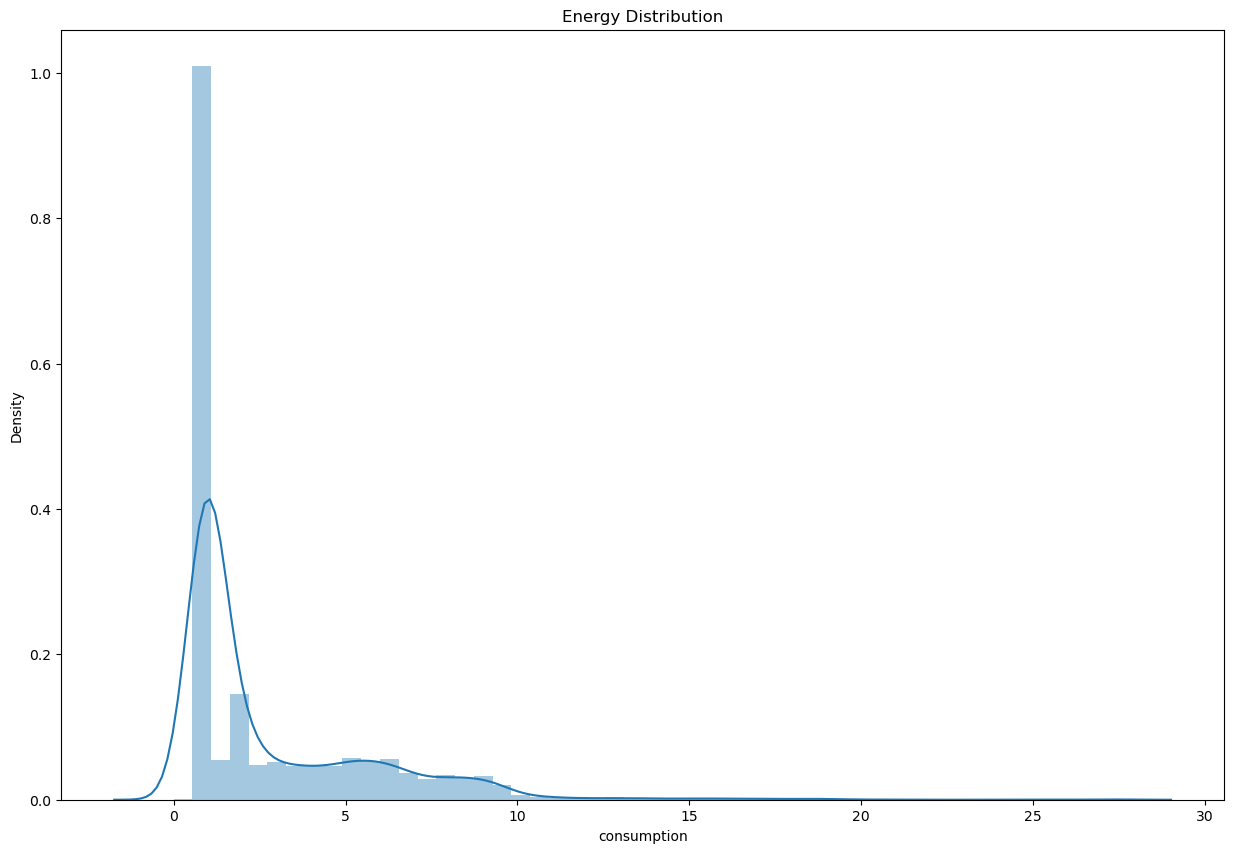

In [26]:
fig = plt.figure(figsize = (15,10))
sns.distplot(df["consumption"])
plt.title("Energy Distribution")

In [27]:
print("Old Dataset: ", df.shape)
print("New Dataset: ", df_copy.shape)

Old Dataset:  (3606, 3)
New Dataset:  (59, 2)


/Users/rohitthapar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

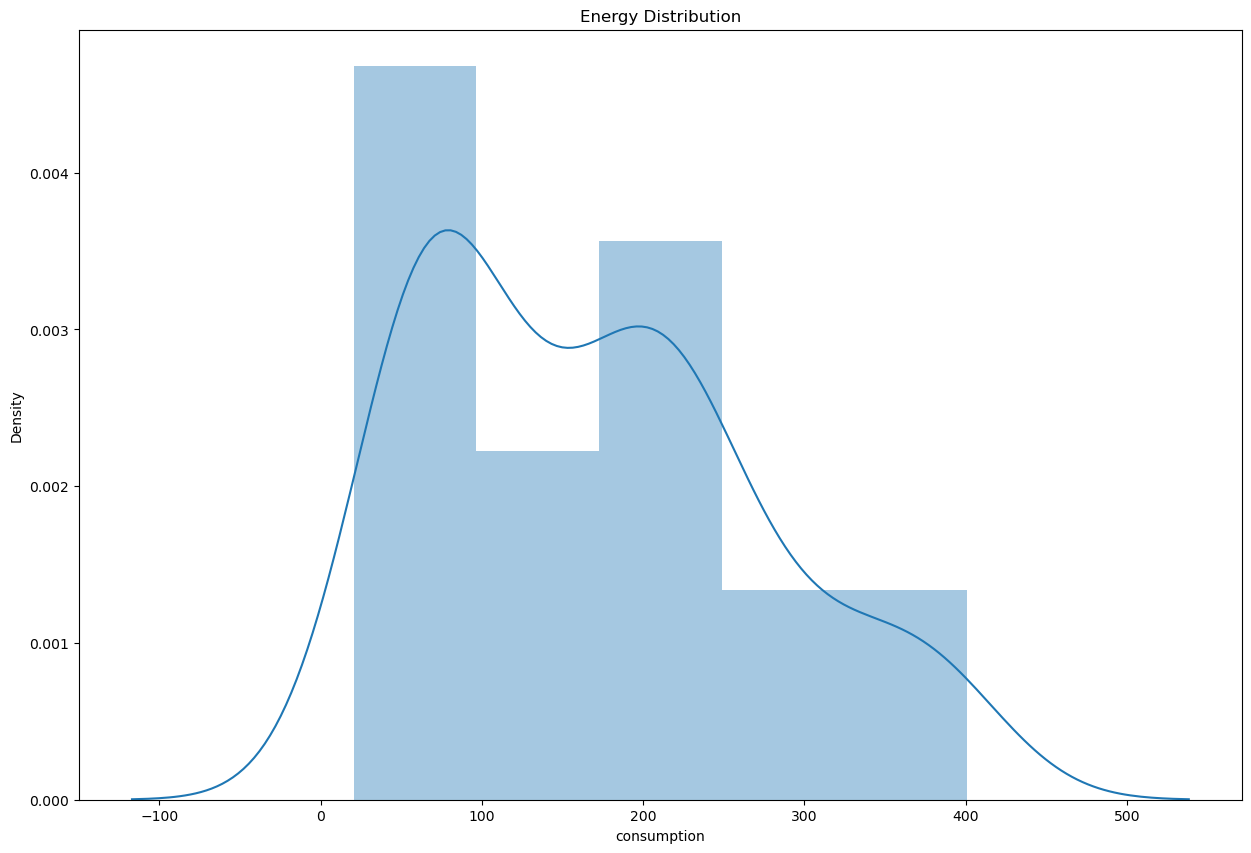

In [35]:
fig = plt.figure(figsize = (15,10))
sns.distplot(df_copy["consumption"])
plt.title("Energy Distribution")

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler(feature_range = (0,1)) 
y = df["consumption"]
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.03775106]
 [0.03313297]
 [0.03313297]
 [0.06780531]
 [0.06883155]
 [0.04002346]
 [0.033866  ]
 [0.03459903]
 [0.0337194 ]
 [0.03401261]]


In [37]:
x = df["datetime"]
y = df["consumption"]

In [38]:
x.head()

43   2022-01-01 00:22:28
19   2022-01-01 00:42:33
25   2022-01-01 01:01:51
11   2022-01-01 01:41:48
29   2022-01-01 02:22:52
Name: datetime, dtype: datetime64[ns]

In [40]:
y.head()

43    1.030
19    0.904
25    0.904
11    1.850
29    1.878
Name: consumption, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [43]:
X_train.head()

717    2022-02-12 20:09:34
363    2022-01-07 08:06:46
1506   2022-02-24 13:03:36
123    2022-02-02 01:41:10
383    2022-02-06 11:17:29
Name: datetime, dtype: datetime64[ns]

In [46]:
y_test.head()

1470    0.956
1029    0.960
217     0.888
1265    3.756
204     6.110
Name: consumption, dtype: float64

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [53]:
y_pred = model.predict(pd.to_numeric(X_test).values.reshape(-1, 1))

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

In [58]:
mse

8.512938795654922

In [59]:
r2

0.049856817478780235